<img src="escudo_utfsm.gif" style="float:right;height:100px">
<img src="IsotipoDIisocolor.png" style="float:left;height:100px">
<center>
    <h1> ILI285/INF285 Computación Científica </h1>
    <h1> Tarea N°1: Introducción a Jupyter Notebook </h1>
    <h3> [S]cientific [C]omputing [T]eam 2018</h3>
</center>

<p>
<center>_Marzo 2018_ </center>
</p>

<center>
    <strong> José Miguel Castro Opazo </strong>
    <br>
    <span> jose.castroo.12@sansano.usm.cl </span>
    <br>
    <span> 201273514-9 </span>
</center>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
import time
np.warnings.filterwarnings('ignore')

## Introducción

El objetivo de este laboratorio es familiarizarse con la herramienta Jupyter notebook, esta es una plataforma web que permite crear y compartir documentos que contienen código fuente, ecuaciones, visualizaciones y texto explicativo.
El lenguaje de programación a utilizar será Python, es una buena alternativa debido a que Python posee muchos modulos especializados en algebra lineal, metodos numericos, vizualizcción de datos,etc. 

En este laboratorio se resolverán distintos problemas de álgebra lineal utilizando dos métodos: haciendo uso del módulo de resolución *solve* de SciPy y utilizando la inversa de la matríz para calcular el vector incógnito. Se estudiarán tanto los tiempos tomados por cada método para resolver el problema como el error de cálculo que estos presentan. Los resultados serán expuestos utilizando distintos tipos de gráficos, los cuales serán generados utilizando *matplotlib*

## Pregunta 1 [20 Pts]

1) Una farmacia vende 10 frascos de vitamina A, 5 frascos de vitamina C y 25 frascos de vitamina D, todo por un valor de 355 pesos. Además, vende 20 frascos de vitamina A, 10 de vitamina C y 10 de vitamina D por un total de 310 pesos. Por otra parte vende 12 frascos de vitamina A, 4 de vitamina C y 15 de vitamina D por un total de 266 pesos. Encuentra el costo correspondiente a cada frasco de las vitaminas A, C y D.

2) Se tiene el siguiente sistema de ecuaciones:

\begin{align}
6x_1 - 5x_2 - 7x_3 - 4x_4 + 3x_5 + 8x_6 &= -44 \\
-7x_1 + 4x_2 + 7x_3 + 1x_4 - 3x_5 + 8x_6 &= 8 \\
6x_1 - 3x_2 + 7x_3 - 6x_4 + 5x_5 - 6x_6 &= 104 \\
8x_1 - 5x_2 + 7x_3 + x_4 - 6x_5 + 4x_6 &= 44\\
2x_1 + 8x_2 + 6x_3 + 2x_4 - 8x_5 + 3x_6 &= -47\\
-2x_1 + 4x_2 + 5x_3 + 7x_4 - 6x_5 - 5x_6 &= 6
\end{align}

Represente ambos problemas como un sistema matricial, es decir de la forma $A\mathbf{x}$ = $ \mathbf{b}$ , luego encuentre los valores del vector $\mathbf{x}$: 
* Usando la función *solve* de SciPy [[1]](#bib).
* Haciendo uso de la inversa de A y el vector $\mathbf{b}$. ($\mathbf{x} = A^{-1} \mathbf{b}$).

Además, calcule el tiempo que demoran los dos métodos anteriores.

### Desarrollo P1

El problema nº1 se puede representar de la siguiente manera:

In [2]:
A_1 = np.array([[10,5,25],[20,10,10],[12,4,15]])
b_1 = np.array([355,310,266])

Y la resolución utilizando ambos métodos son:

In [3]:
stime = time.time()
x_1_a = linalg.solve(A_1,b_1)
time_a = time.time() - stime

stime = time.time()
x_1_b = np.linalg.inv(A_1).dot(b_1)
time_b = time.time() - stime

print("Resultado A calculado en %ss"%time_a)
print(x_1_a)

print("Resultado B calculado en %ss"%time_b)
print(x_1_b)


Resultado A calculado en 0.029430389404296875s
[ 8.  5. 10.]
Resultado B calculado en 0.0002665519714355469s
[ 8.  5. 10.]


De este rasultado se concluye que el precio para las Vitaminas A, C y D es de 8, 5 y 10 pesos respectivamente.

Además se nota que el tiempo de calculo al utilizar el segundo método es casi un tercio del primero.

El problema nº2 se puede representar de la siguiente manera:

In [4]:
A_2 = np.array([
    [6,-5,-7,-4,3,8],
    [-7,4,7,1,-3,8],
    [6,-3,7,-6,5,-6],
    [8,-5,7,1,6,4],
    [2,8,6,2,-8,3],
    [-2,4,5,7,-6,-5]
])
b_2 = np.array([-44,8,104,44,-47,6])

Y la resolución utilizando ambos métodos son:

In [5]:
stime = time.time()
x_2_a = linalg.solve(A_2,b_2)
time_a = time.time() - stime

stime = time.time()
x_2_b = np.linalg.inv(A_2).dot(b_2)
time_b = time.time() - stime

print("Resultado A calculado en %ss"%time_a)
print(x_2_a)

print("Resultado B calculado en %ss"%time_b)
print(x_2_b)


Resultado A calculado en 0.0008788108825683594s
[ -3.57156468 -10.47925247   7.77028948  -4.53395383  -2.29477464
  -3.97829241]
Resultado B calculado en 0.0002675056457519531s
[ -3.57156468 -10.47925247   7.77028948  -4.53395383  -2.29477464
  -3.97829241]


Se vuelve a notar que el tiempo de calculo al utilizar el segundo método es menor.

## Pregunta 2 [30 Pts]

La matriz de Hilbert es una matriz cuadrada que cuenta con la siguiente forma:

$$
H_{i,j} = \frac{1}{i+j-1}, i,j = 1\ldots n
$$

Construya la función *Hilbert(n)*, mediante la siguiente estructura:

```python
'''
n - (integer) Matrix size
H - (2D-array) Hilbert matrix
x - (1D-array) Random vector x
b - (1D-array) Vector result of Ax
'''
```
```python     
def Hilbert(n):
    ...
    return H, x, b
```

Esta función deberá retornar matrices de Hilbert, vectores $\mathbf{x}$ de forma aleatoria (recuerde elegir una semilla para poder reproducir sus experimentos) y un vector $\mathbf{b}$ construido a partir de $A\mathbf{x} = \mathbf{b}$. Se deberá mostrar a través de un gráfico los tiempos de resolución de cada método (usando la función *solve* de SciPy y resolviendo directamente $\mathbf{x} = A^{-1} \mathbf{b}$) para matrices de tamaño 10, 100, 300, 500, 700, 1000, 1300. Calcule el error de sus dos métodos con respecto al vector $\mathbf{x}$ creado anteriormente y grafique el tamaño de la matriz vs el error. Concluya.

Para los gráficos de tiempo, ocupe la función *loglog*, y para los de error *semilogy* [[2]](#bib).

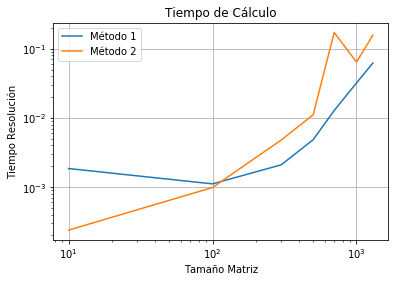

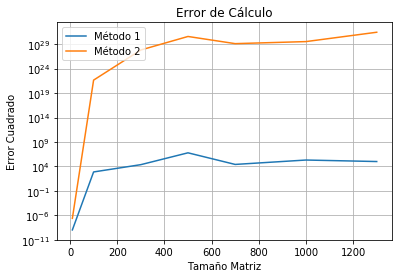

In [6]:
np.random.seed(14)

def solve(a,b):
    # method 1
    stime = time.time()
    x_a = linalg.solve(a,b)
    time_a = time.time() - stime

    # method 2
    stime = time.time()
    x_b = np.linalg.inv(a).dot(b)
    time_b = time.time() - stime
    return (x_a, x_b, time_a, time_b)

def Hilbert(n):
    H = linalg.hilbert(n)
    x = np.random.rand(n)
    b = H.dot(x)
    return H, x, b

results_2 = [[],[],[],[]]
r = [10, 100, 300, 500, 700, 1000, 1300]
for i in r:
    H, x, b = Hilbert(i)
    x_a, x_b, t_a, t_b = solve(H,b)
    mse_a = ((x - x_a) ** 2).mean()
    mse_b = ((x - x_b) ** 2).mean()
    results_2[0].append(mse_a)
    results_2[1].append(mse_b)
    results_2[2].append(t_a)
    results_2[3].append(t_b)
    
plt.loglog(r,results_2[2],label="Método 1")
plt.loglog(r,results_2[3],label="Método 2")
plt.xlabel('Tamaño Matriz')
plt.ylabel('Tiempo Resolución')
plt.legend(loc='upper left')
plt.grid(True)
plt.title('Tiempo de Cálculo')
plt.show()

plt.semilogy(r,results_2[0],label="Método 1")
plt.semilogy(r,results_2[1],label="Método 2")
plt.xlabel('Tamaño Matriz')
plt.ylabel('Error Cuadrado')
plt.legend(loc='upper left')
plt.grid(True)
plt.title('Error de Cálculo')
plt.show()
    


Como se comentó en la primera pregunta, el tiempo de resolución tomado por el segundo método es inicialmente menor, pero a medida que el tamaño de la matriz aumenta, el primer método pasa a ser el más rápido, esto puede ser explicado porque el algoritmo utilizado para la resolución del problema está optimizado para matrices de mayor tamaño, como las utilizadas en esta prueba (>1000).

Además tambien se nota que el error obtenido por el primer método es mucho menor al del segundo.

## Pregunta 3 [40 Pts]

Usando la función *Hilbert(n)* creada anteriormente, repita 50 veces cada método con matrices de tamaño 10, 100, 300, 500, 700, 1000, 1300, y guarde sus tiempos de ejecución. Con esta data, realice un gráfico de *boxplot* [[3]](#bib) de cada método (en total serán 14 *boxplots*), indicando claramente a que método corresponde cada boxplot. Una con una línea las medias de cada método en los boxplots mostrados y concluya.

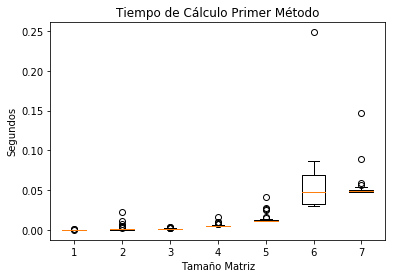

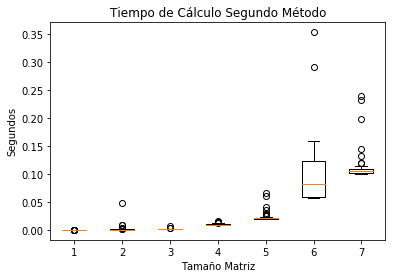

In [7]:
results_3 = [[],[]]

for i in [10, 100, 300, 500, 700, 1000, 1300]:
    t_a = []
    t_b = []
    for n in range(50):
        H, x, b = Hilbert(i)
        _, _, t_an, t_bn = solve(H,b)
        t_a.append(t_an)
        t_b.append(t_bn)
        
    results_3[0].append(t_a)
    results_3[1].append(t_b)

plt.boxplot(results_3[0])
plt.xlabel('Tamaño Matriz')
plt.ylabel('Segundos')
plt.title('Tiempo de Cálculo Primer Método')
plt.show()

plt.boxplot(results_3[1])
plt.xlabel('Tamaño Matriz')
plt.ylabel('Segundos')
plt.title('Tiempo de Cálculo Segundo Método')
plt.show()


Se los resultados siguen confirmando lo mencionado anteriormente, el primer método (utilizando linalg) tiene un mayor desempeño en la solución de los problemas presentados. Además se nota que la desviación de los tiempos para cada tamaño es levemente mayor para el segundo método.

# Instrucciones:

* La estructura del laboratorio es la siguiente:
     1. Título, nombre de estudiante, email y rol.
     2. Introducción.
     3. Desarrollo y análisis de resultados.
     4. Conclusiones.
     5. Referencias.
* El laboratorio debe ser realizado en `Jupyter Notebook` (`Python3`).
* Se evaluará la correcta utilización de librerias `NumPy`, `SciPy`, `SymPy`, `Matplotlib` y `ipywidgets`, así como la correcta implementación de algoritmos vectorizados.
* El archivo de entrega debe denominarse Tarea1-rol.tar.gz y debe contener un directorio con todos los archivos necesarios para ejecutar el notebook, junto con un archivo README indicando explícitamente las librerías o módulos utilizados, nombre y rol del estudiante.
* El descuento por día de atraso será de $30$ puntos, con un máximo de 1 día de atraso. No se recibirán entregas después de este día.
* El trabajo es personal, no se permite compartir código ni utilizar código de otros, aunque sí se sugiere discutir aspectos generales con sus compañeros.
* En caso de sospecha de no cumplimiento de estas instrucciones, se solicitará al involucrado o la involucrada a aclarar la situación. Dependiendo de la justificación se decidirá su calificación, la cual podrá o no ser penalizada.
* El no seguir estas instrucciones, implica descuentos en su nota obtenida.

<a id='bib'></a>
## Referencias

* 1.- <a href=https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.solve.html>[1] Documentación del método *solve* de  SciPy </a>
* 2.- <a href=https://matplotlib.org/examples/pylab_examples/log_demo.html>[2] Gráficos con *semilogy* y *loglog* </a>
* 3.- <a href=https://stackoverflow.com/questions/16592222/matplotlib-group-boxplots>[3] Crear grupos de boxplots </a>